In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

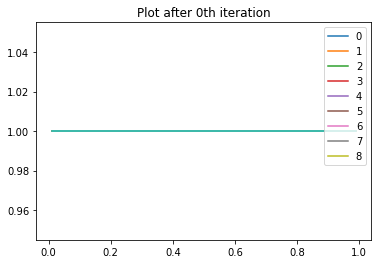

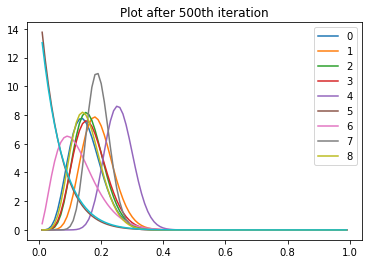

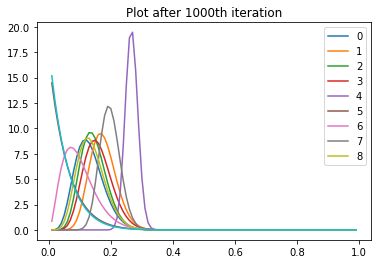

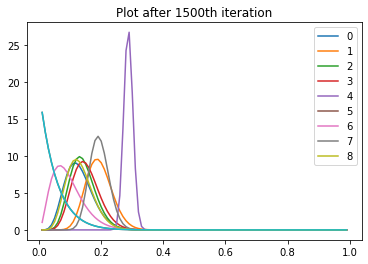

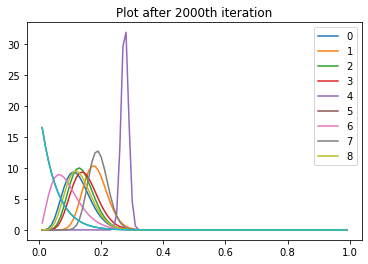

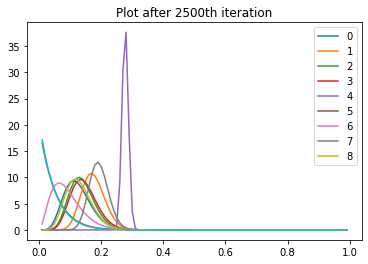

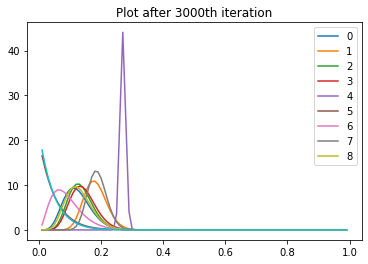

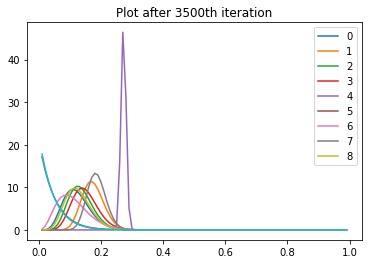

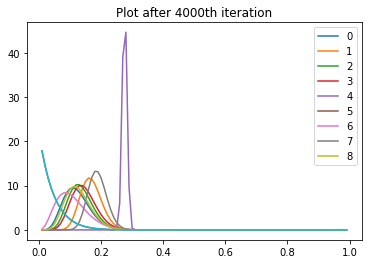

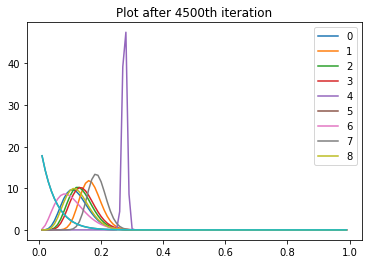

In [ ]:
import random
from scipy.stats import beta
N = 5000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 = [0]*d
total_rewards = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  x = np.arange (0.01, 1, 0.01)
  lgd = []
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
    if(n%500==0):
      y = beta.pdf(x,numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
      plt.title('Plot after '+str(n)+'th iteration')
      lgd.append(i)
      plt.legend(lgd)
      plt.plot(x,y)
      
    if(random_beta>max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if(reward == 1):
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_rewards =  total_rewards + reward
  plt.show()
  lgd = []

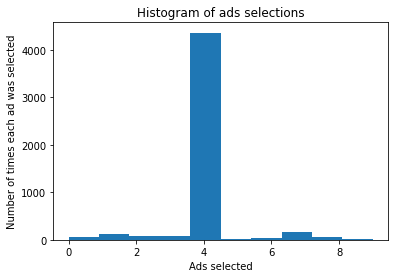

In [ ]:
# visualising 
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads selected')
plt.ylabel('Number of times each ad was selected')
plt.show()